In [10]:
import pandas as pd
import matplotlib.pyplot as plt
#df_movies_master = pd.read_csv("~/sea18_ds5/challenges/challenges_data/2013_movies.csv")
#df_movies_master.head()

# Challenge 1

Plot domestic total gross over time.



In [8]:
# TODO: need more data?

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


# Challenge 2

Plot runtime vs. domestic total gross.

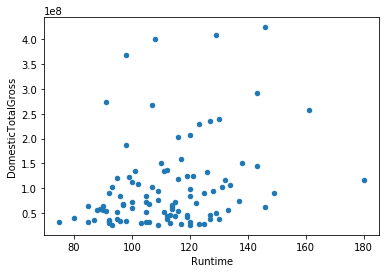

In [21]:
df = df_movies_master[['Runtime', 'DomesticTotalGross']]
df.plot(kind='scatter', x='Runtime', y='DomesticTotalGross')

# Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [25]:
df = df_movies_master.groupby(['Rating']).sum().reset_index()
df.head()

,Rating,Budget,DomesticTotalGross,Runtime
0,G,0.000000e+00,268492764,107
1,PG,1.409000e+09,1967035741,1499
2,PG-13,3.961000e+09,5238139144,5523
3,R,1.282500e+09,2586019873,4097


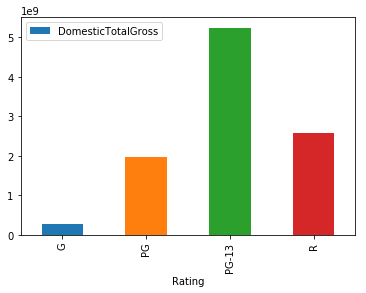

In [26]:
df.plot(kind='bar', x='Rating', y='DomesticTotalGross')

# Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

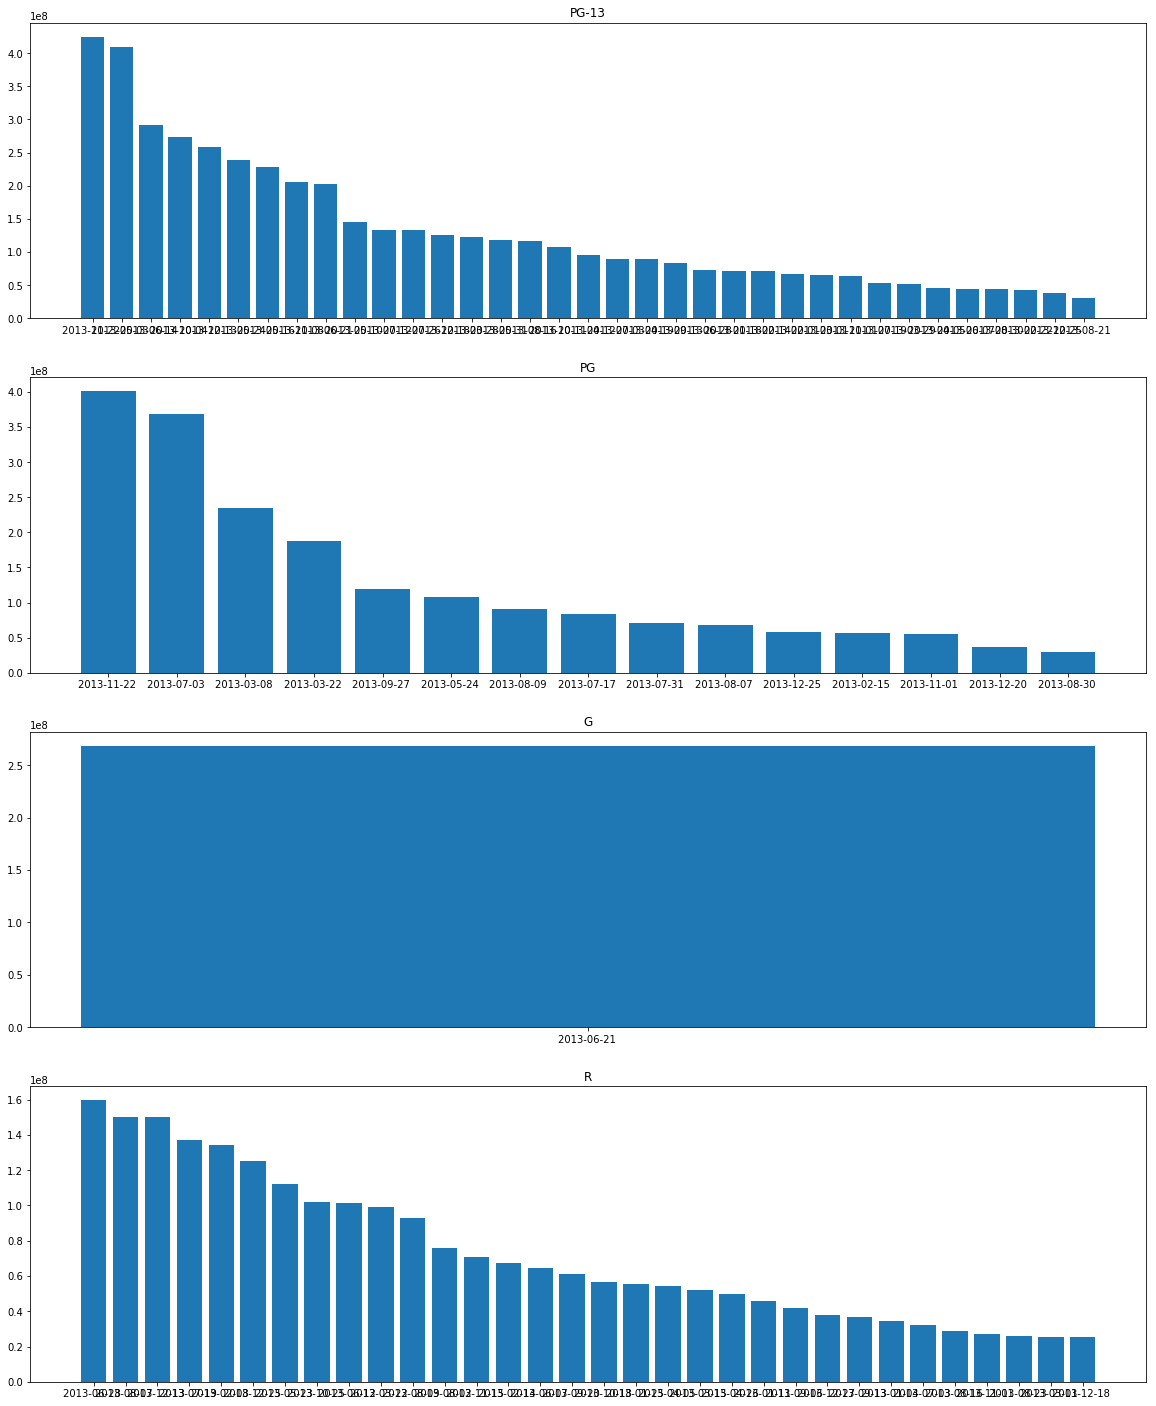

In [42]:
# TODO fix axes scale and labeling
N = len(df_movies_master.Rating.unique())
fig, axes = plt.subplots(nrows=N,figsize=(20,25))

for i, rating in enumerate(df_movies_master.Rating.unique()):
    ax = axes[i]
    ax.set_title(rating)
    df = df_movies_master[df_movies_master['Rating'] == rating]
    ax.bar(x=[d.strip('00:00:00') for d in df['ReleaseDate']],
           height=df['DomesticTotalGross'])

# Challenge 5

What director in your dataset has the highest gross per movie?

Francis Lawrence


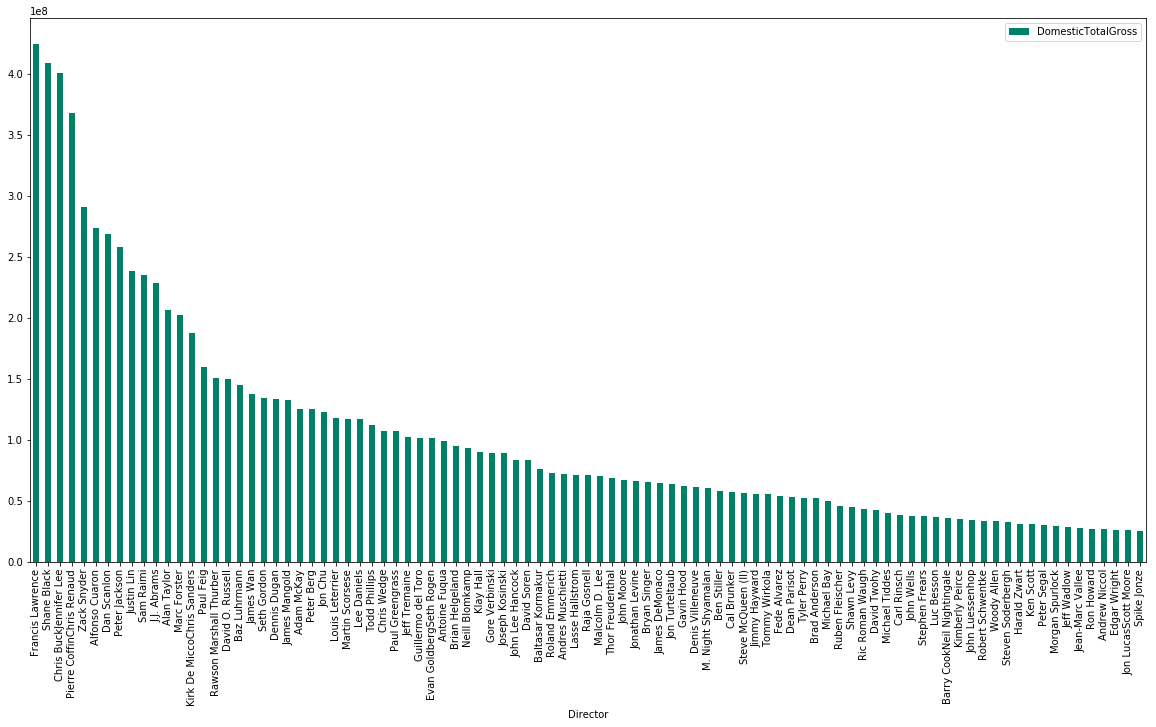

In [80]:
df = df_movies_master.groupby('Director').max().reset_index().sort_values('DomesticTotalGross', ascending=False)
print(df.Director.iloc[0])
df.plot.bar(x='Director', y='DomesticTotalGross', figsize=(20,10), colormap='summer')

# Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."